In [111]:
%matplotlib inline
import h5pyd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.spatial import cKDTree

END_POINT = 'https://developer.nrel.gov/api/hsds/'
API_TOKEN = '3K3JQbjZmWctY0xmIfSYvYgtIcM3CN0cb1Y2w9bf' 
# for security reason, personal token is hidden
# this token for demo only, go to https://developer.nrel.gov/signup/ for actual token

yr_2017 = "/nrel/nsrdb/nsrdb_2017.h5"

#Find solar irradiance difference at different city
#Example1:NYC and Miami
#Example2:San Diego, Seattle

f_17 = h5pyd.File(yr_2017, 'r', endpoint=END_POINT, api_key=API_TOKEN)
ghi_17 = f_17['ghi']
#more factors to consider
#temp_17 = f_17['air_temperature']
#rain_17 = f_17['total_precipitable_water']
#windspeed_17 = f_17['wind_speed']
time_index = pd.to_datetime(f_17['time_index'][...].astype(str))

tree = cKDTree(ghi_17_coords)
def nearest_site(tree, lat_coord, lon_coord):
    lat_lon = np.array([lat_coord, lon_coord])
    dist, pos = tree.query(lat_lon)
    return pos

NewYorkCity = (40.7128, -74.0059)
SanDiego = (32.7157,-117.1611)
Seatle = (47.6062,-122.3321)
Miami = (25.7617,-80.1918)

NewYorkCity_idx = nearest_site(tree, NewYorkCity[0], NewYorkCity[1] )
SanDiego_idx = nearest_site(tree, SanDiego[0], SanDiego[1] )
Seatle_idx = nearest_site(tree, Seatle[0], Seatle[1] )
Miami_idx = nearest_site(tree, Miami[0], Miami[1] )


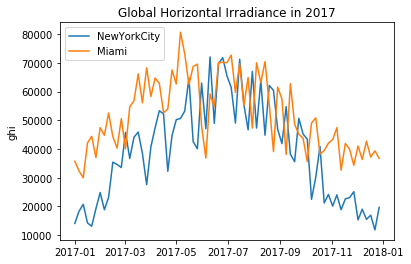

In [112]:
# Get the entire 2017 timeseries data for each city for 5 days (120 hour * 2 data points)
nyc_ghi_17 = pd.Series(ghi_17[:,NewYorkCity_idx])
nyc_ghi_day_17 = nyc_ghi_17.values.reshape(-1, 240).sum(1)
tseries_nyc = nyc_ghi_day_17/ghi_17.attrs['psm_scale_factor']

san_ghi_17 = pd.Series(ghi_17[:,SanDiego_idx])
san_ghi_day_17 = san_ghi_17.values.reshape(-1, 240).sum(1)
tseries_san = san_ghi_day_17/ghi_17.attrs['psm_scale_factor']

sea_ghi_17 = pd.Series(ghi_17[:,Seatle_idx])
sea_ghi_day_17 = sea_ghi_17.values.reshape(-1, 240).sum(1)
tseries_sea = sea_ghi_day_17/ghi_17.attrs['psm_scale_factor']

mia_ghi_17 = pd.Series(ghi_17[:,Miami_idx])
mia_ghi_day_17 = mia_ghi_17.values.reshape(-1, 240).sum(1)
tseries_mia = mia_ghi_day_17/ghi_17.attrs['psm_scale_factor']

plt.plot(time_index[::240], tseries_nyc)
plt.plot(time_index[::240], tseries_mia)

plt.ylabel("ghi")
plt.title("Global Horizontal Irradiance in 2017")
plt.legend(['NewYorkCity', 'Miami'], loc='upper left')

plt.show()



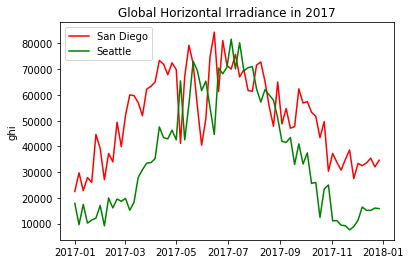

In [117]:
plt.plot(time_index[::240], tseries_san,'r')
plt.plot(time_index[::240], tseries_sea,'g')

plt.ylabel("ghi")
plt.title("Global Horizontal Irradiance in 2017")
plt.legend(['San Diego', 'Seattle'], loc='upper left')

plt.show()